<a href="https://colab.research.google.com/github/debypivatto/my-project/blob/main/Analise_de_Aplicativo_para_Start_up_Produtos_Alimenticios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise de Usuarios

1. Abrindo o arquivo de dados e leia a informação geral

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from scipy import stats as st
from scipy.stats import chi2_contingency
# importando bibliotecas

In [ ]:
df =  pd.read_csv('/datasets/logs_exp_us.csv')

In [ ]:
print(df.head(5))

      EventName\tDeviceIDHash\tEventTimestamp\tExpId
0  MainScreenAppear\t4575588528974610257\t1564029...
1  MainScreenAppear\t7416695313311560658\t1564053...
2  PaymentScreenSuccessful\t3518123091307005509\t...
3  CartScreenAppear\t3518123091307005509\t1564054...
4  PaymentScreenSuccessful\t6217807653094995999\t...


In [ ]:
print(df.sample(5))

           EventName\tDeviceIDHash\tEventTimestamp\tExpId
75636   MainScreenAppear\t8827221307118261838\t1564803...
160202  MainScreenAppear\t263151724829065592\t15650131...
166547  MainScreenAppear\t434103746454591587\t15650210...
188518  OffersScreenAppear\t6230745365011993015\t15650...
31019   CartScreenAppear\t4675313264982714685\t1564679...


In [ ]:
df.describe()

,EventName\tDeviceIDHash\tEventTimestamp\tExpId
count,244126
unique,243713
top,PaymentScreenSuccessful\t636437379427729086\t1...
freq,5


In [ ]:
df.nunique()

EventName\tDeviceIDHash\tEventTimestamp\tExpId    243713
dtype: int64

In [ ]:
df

,EventName\tDeviceIDHash\tEventTimestamp\tExpId
0,MainScreenAppear\t4575588528974610257\t1564029...
1,MainScreenAppear\t7416695313311560658\t1564053...
2,PaymentScreenSuccessful\t3518123091307005509\t...
3,CartScreenAppear\t3518123091307005509\t1564054...
4,PaymentScreenSuccessful\t6217807653094995999\t...
...,...
244121,MainScreenAppear\t4599628364049201812\t1565212...
244122,MainScreenAppear\t5849806612437486590\t1565212...
244123,MainScreenAppear\t5746969938801999050\t1565212...
244124,MainScreenAppear\t5746969938801999050\t1565212...


2. Preparando os dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [ ]:
df = pd.read_csv('/datasets/logs_exp_us.csv', sep= '\t')

In [ ]:
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente usando o separador `\t`
- O import das bibliotecas foi feito de forma correta e em uma célula separada
</div>

In [ ]:
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [ ]:
df.columns

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')

In [ ]:
df = df.rename(columns={'EventName': 'event',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'timestamp',
    'ExpId': 'experiment_group'}) # renomeando as colunas para minusculas

In [ ]:
df.columns #verificando como ficou

Index(['event', 'user_id', 'timestamp', 'experiment_group'], dtype='object')

In [ ]:
df.head(5)

,event,user_id,timestamp,experiment_group
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [ ]:
df.duplicated().sum()

413

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Converter timestamp para datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

In [ ]:
df

,event,user_id,timestamp,experiment_group,datetime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58


In [ ]:
df['date'] = df['datetime'].dt.date

In [ ]:
df # nova coluna para data criada

,event,user_id,timestamp,experiment_group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [ ]:
print(df.info(memory_usage='deep')) # verificando tamanho do arquivo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event             243713 non-null  object        
 1   user_id           243713 non-null  int64         
 2   timestamp         243713 non-null  int64         
 3   experiment_group  243713 non-null  int64         
 4   datetime          243713 non-null  datetime64[ns]
 5   date              243713 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 35.9 MB
None


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['date']) # convertendo as colunas para datetime

In [ ]:
df

,event,user_id,timestamp,experiment_group,datetime,date
0,MainScreenAppear,4575588528974610257,1970-01-01 00:00:01.564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1970-01-01 00:00:01.564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1970-01-01 00:00:01.564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1970-01-01 00:00:01.564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1970-01-01 00:00:01.564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1970-01-01 00:00:01.565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1970-01-01 00:00:01.565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1970-01-01 00:00:01.565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1970-01-01 00:00:01.565212498,246,2019-08-07 21:14:58,2019-08-07


In [ ]:
print(df.info(memory_usage='deep')) # verificando se reduziu tamanho do arquivo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event             243713 non-null  object        
 1   user_id           243713 non-null  int64         
 2   timestamp         243713 non-null  datetime64[ns]
 3   experiment_group  243713 non-null  int64         
 4   datetime          243713 non-null  datetime64[ns]
 5   date              243713 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(1)
memory usage: 28.4 MB
None


In [ ]:
print(df.isna().sum()) # verificando valores ausentes

event               0
user_id             0
timestamp           0
experiment_group    0
datetime            0
date                0
dtype: int64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os nomes das colunas foram convertidos para seguir o padrão `snake_case`
- A hora foi extraída a partir do timestamp
</div>

3. Estudando e Verificando os dados

Quantos eventos ficam nos registros?

In [ ]:
total_events = df.shape[0]

In [ ]:
print(total_events)

243713


Quantos usuários ficam nos registros?

In [ ]:
total_users = df['user_id'].nunique()

In [ ]:
total_users

7551

Qual é o número médio de eventos por usuário?

In [ ]:
avg_events_per_user = total_events / total_users

In [ ]:
avg_events_per_user

32.27559263673685

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
  
As estatísticas dos usuários foram analisadas
</div>

Qual é o período de tempo que os dados cobrem? Encontre as datas máxima e mínima.

In [ ]:
df['date'].describe()

count                  243713
unique                     14
top       2019-08-01 00:00:00
freq                    36141
first     2019-07-25 00:00:00
last      2019-08-07 00:00:00
Name: date, dtype: object

Desenhe um histograma por data e hora. Você pode ter certeza de que possui os dados igualmente completos para todo o período? Os eventos mais antigos podem acabar aparecendo nos diários de alguns usuários por motivos técnicos, e isso pode distorcer o quadro geral. Encontre o momento em que os dados começam a ser completos e ignore a seção anterior. Qual período os dados realmente representam?

In [ ]:
df['date'].min() # data minima

Timestamp('2019-07-25 00:00:00')

In [ ]:
df['date'].max() # data maxima

Timestamp('2019-08-07 00:00:00')

In [ ]:
df['date'].mean()

Timestamp('2019-08-03 21:33:56.735012096')

Os dados cobrem periodo entre 25 de julho de 2019 a 07 de agosto de 2019.

In [ ]:
df['date'].value_counts().sort_index()

2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      412
2019-07-31     2030
2019-08-01    36141
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-05    36058
2019-08-06    35788
2019-08-07    31096
Name: date, dtype: int64

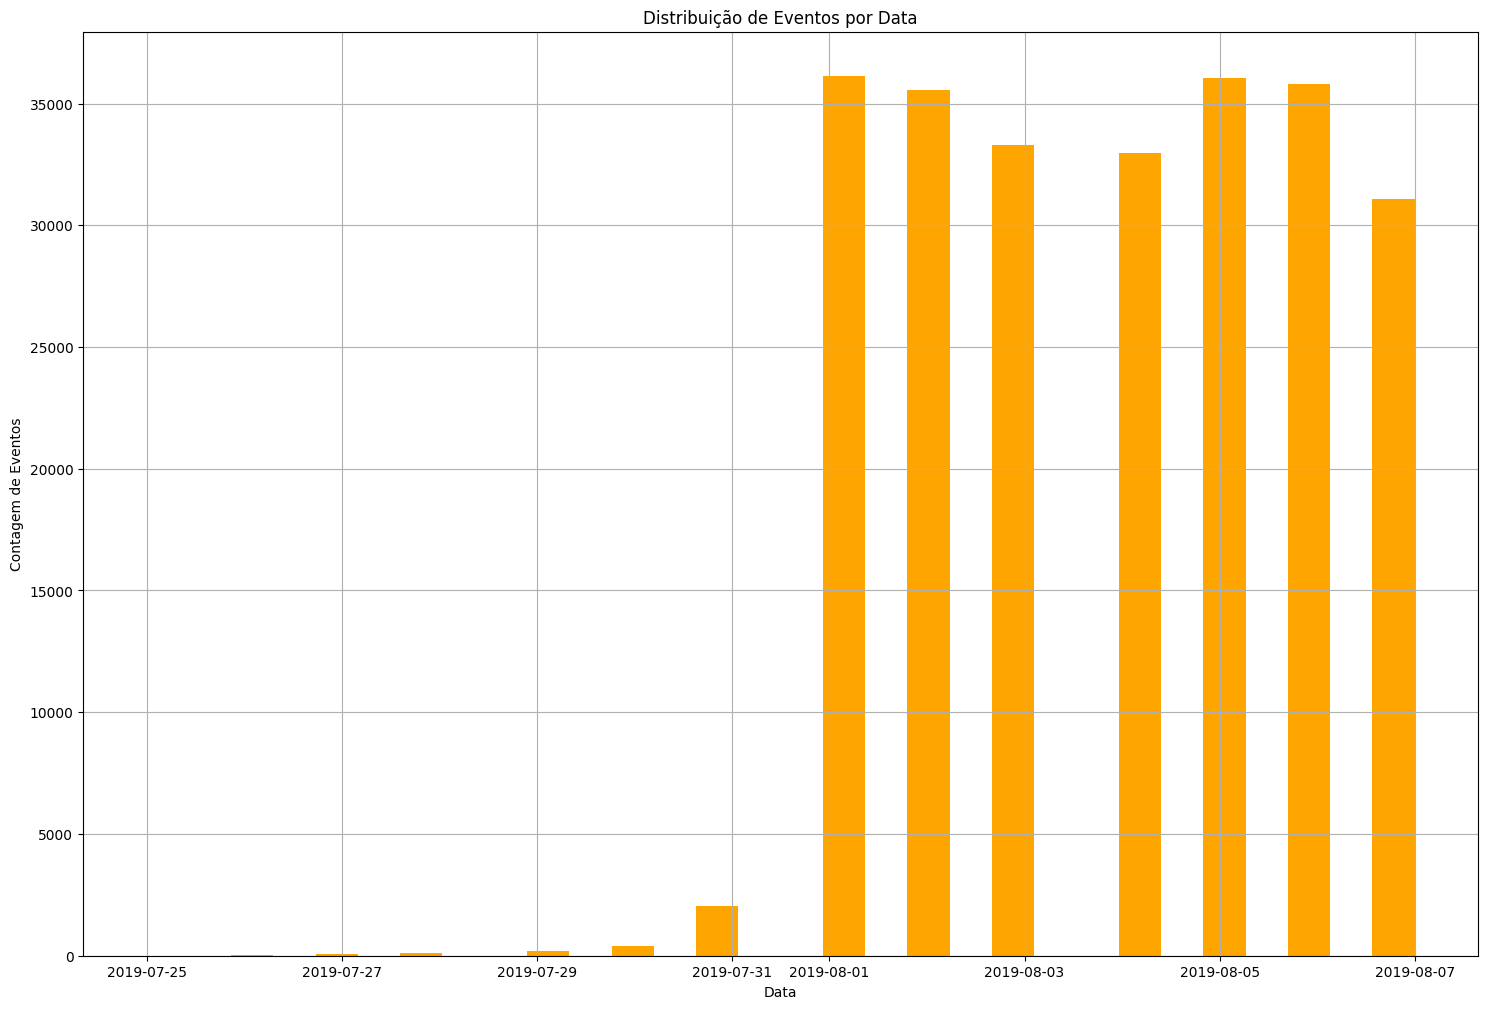

In [ ]:
# Histograma
df['date'].hist(bins=30, figsize=(18,12), color = 'orange')
plt.title('Distribuição de Eventos por Data')
plt.xlabel('Data')
plt.ylabel('Contagem de Eventos')
plt.show()

In [ ]:
df['datetime'].describe()

count                  243713
unique                 176654
top       2019-08-01 14:40:35
freq                        9
first     2019-07-25 04:43:36
last      2019-08-07 21:15:17
Name: datetime, dtype: object

In [ ]:
df['datetime'].max()

Timestamp('2019-08-07 21:15:17')

In [ ]:
df['datetime'].min()

Timestamp('2019-07-25 04:43:36')

In [ ]:
df['datetime'].mean()

Timestamp('2019-08-04 10:19:17.987665920')

In [ ]:
df['datetime'].value_counts().reset_index()

,index,datetime
0,2019-08-01 14:40:35,9
1,2019-08-04 16:23:19,9
2,2019-08-07 15:24:29,8
3,2019-08-07 11:18:41,8
4,2019-08-04 09:44:06,8
...,...,...
176649,2019-08-04 14:51:14,1
176650,2019-08-03 19:18:42,1
176651,2019-08-05 12:55:27,1
176652,2019-08-02 01:47:04,1


In [ ]:
df['datetime'].value_counts().sort_index()

2019-07-25 04:43:36    1
2019-07-25 11:11:42    1
2019-07-25 11:28:47    2
2019-07-25 11:48:42    1
2019-07-25 11:48:43    1
                      ..
2019-08-07 21:12:25    1
2019-08-07 21:13:59    1
2019-08-07 21:14:43    1
2019-08-07 21:14:58    1
2019-08-07 21:15:17    1
Name: datetime, Length: 176654, dtype: int64

Os dados mais consistentes estao entre 1/8 e 7/8, segunda semana dos eventos.

In [ ]:
df['hora'] = df['datetime'].dt.hour # Extrai apenas a hora (0 a 23) dos dados

In [ ]:
df['hora'].value_counts().sort_index() # contando todas os eventos por hora (0 a 23)

0      1487
1      1986
2      2785
3      4345
4      6162
5      8545
6     10089
7     11292
8     13142
9     14740
10    14517
11    16358
12    15002
13    15711
14    18109
15    18051
16    16994
17    15579
18    12996
19    11260
20     7089
21     4243
22     2036
23     1195
Name: hora, dtype: int64

In [ ]:
df['hora'].value_counts().head(5) # ordenando por hora (0 a 23) por ordem decrescente (top 5)

14    18109
15    18051
16    16994
11    16358
13    15711
Name: hora, dtype: int64

Horas 14, 15 e 16 sao as com mais atividade

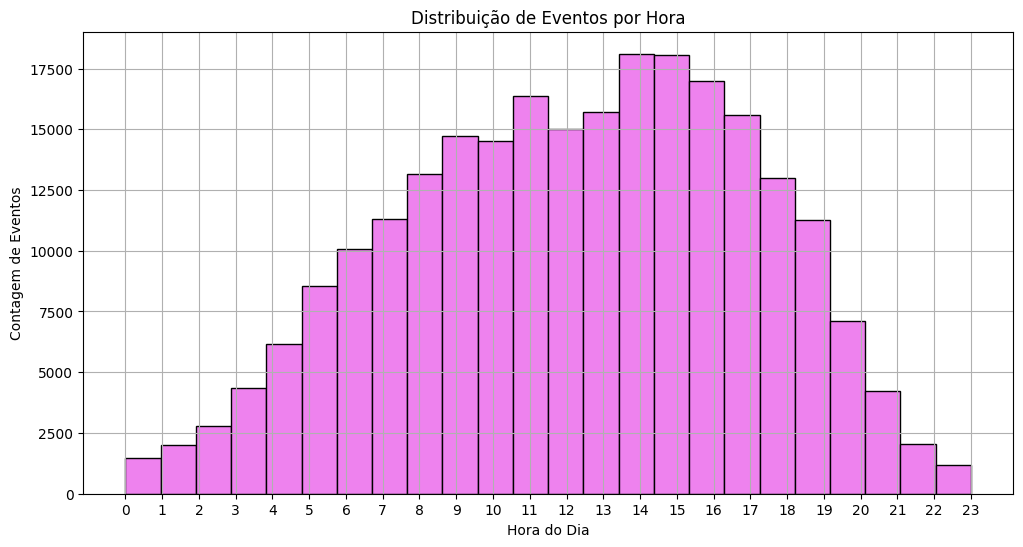

In [ ]:
# Plotando o histograma
df['hora'].hist(bins=24, figsize=(12, 6), edgecolor='black', color= 'violet')
plt.title('Distribuição de Eventos por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Contagem de Eventos')
plt.xticks(range(24))  # Define os ticks do eixo X para cada hora
plt.grid(True)
plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
  
- O número de eventos ao longo dos dias foi analisado
</div>

In [ ]:
start_date = pd.to_datetime('2019-08-01')

In [ ]:
start_date

Timestamp('2019-08-01 00:00:00')

In [ ]:
df_n = df[df['date'] >= start_date]

In [ ]:
df_n # novo dataframe com apenas o periodo de 1 a 07 de agosto, excluindo primeira semana

,event,user_id,timestamp,experiment_group,datetime,date,hora
2828,Tutorial,3737462046622621720,1970-01-01 00:00:01.564618048,246,2019-08-01 00:07:28,2019-08-01,0
2829,MainScreenAppear,3737462046622621720,1970-01-01 00:00:01.564618080,246,2019-08-01 00:08:00,2019-08-01,0
2830,MainScreenAppear,3737462046622621720,1970-01-01 00:00:01.564618135,246,2019-08-01 00:08:55,2019-08-01,0
2831,OffersScreenAppear,3737462046622621720,1970-01-01 00:00:01.564618138,246,2019-08-01 00:08:58,2019-08-01,0
2832,MainScreenAppear,1433840883824088890,1970-01-01 00:00:01.564618139,247,2019-08-01 00:08:59,2019-08-01,0
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1970-01-01 00:00:01.565212345,247,2019-08-07 21:12:25,2019-08-07,21
244122,MainScreenAppear,5849806612437486590,1970-01-01 00:00:01.565212439,246,2019-08-07 21:13:59,2019-08-07,21
244123,MainScreenAppear,5746969938801999050,1970-01-01 00:00:01.565212483,246,2019-08-07 21:14:43,2019-08-07,21
244124,MainScreenAppear,5746969938801999050,1970-01-01 00:00:01.565212498,246,2019-08-07 21:14:58,2019-08-07,21


In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240887 entries, 2828 to 244125
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event             240887 non-null  object        
 1   user_id           240887 non-null  int64         
 2   timestamp         240887 non-null  datetime64[ns]
 3   experiment_group  240887 non-null  int64         
 4   datetime          240887 non-null  datetime64[ns]
 5   date              240887 non-null  datetime64[ns]
 6   hora              240887 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 14.7+ MB


Você perdeu muitos eventos e usuários ao excluir os dados mais antigos?

In [ ]:
total_events_n = df_n.shape[0]

In [ ]:
total_events_n

240887

In [ ]:
total_events

243713

In [ ]:
lost = total_events - total_events_n
lost # eventos perdidos removendo data

2826

In [ ]:
prop = lost/total_events * 100
prop

1.159560630741897

Apenas 1.15% de eventos perdidos .Perdeu poucos eventos em relacao a quantidade total de eventos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
  
O percentual de perda de eventos/usuários após o filtro foi calculado.
</div>

In [ ]:
df_n['date'].value_counts().sort_index()

2019-08-01    36141
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-05    36058
2019-08-06    35788
2019-08-07    31096
Name: date, dtype: int64

In [ ]:
df_n['hora'].value_counts().head(5)

14    17944
15    17892
16    16809
11    16257
13    15566
Name: hora, dtype: int64

Horas 14, 15 e 16 sao as com mais atividade, confirmando que a exclusao do periodo inicial nao prejudicou a analise.

Certifique-se de ter usuários de todos os três grupos experimentais

In [ ]:
df_n['experiment_group'].describe() #verificando se continua a ter os 3 perfis

count    240887.000000
mean        247.021840
std           0.824489
min         246.000000
25%         246.000000
50%         247.000000
75%         248.000000
max         248.000000
Name: experiment_group, dtype: float64

In [ ]:
df_n['experiment_group'].value_counts()

248    84563
246    79302
247    77022
Name: experiment_group, dtype: int64

4. Estudando funil de eventos

In [ ]:
df_n

,event,user_id,timestamp,experiment_group,datetime,date,hora
2828,Tutorial,3737462046622621720,1970-01-01 00:00:01.564618048,246,2019-08-01 00:07:28,2019-08-01,0
2829,MainScreenAppear,3737462046622621720,1970-01-01 00:00:01.564618080,246,2019-08-01 00:08:00,2019-08-01,0
2830,MainScreenAppear,3737462046622621720,1970-01-01 00:00:01.564618135,246,2019-08-01 00:08:55,2019-08-01,0
2831,OffersScreenAppear,3737462046622621720,1970-01-01 00:00:01.564618138,246,2019-08-01 00:08:58,2019-08-01,0
2832,MainScreenAppear,1433840883824088890,1970-01-01 00:00:01.564618139,247,2019-08-01 00:08:59,2019-08-01,0
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1970-01-01 00:00:01.565212345,247,2019-08-07 21:12:25,2019-08-07,21
244122,MainScreenAppear,5849806612437486590,1970-01-01 00:00:01.565212439,246,2019-08-07 21:13:59,2019-08-07,21
244123,MainScreenAppear,5746969938801999050,1970-01-01 00:00:01.565212483,246,2019-08-07 21:14:43,2019-08-07,21
244124,MainScreenAppear,5746969938801999050,1970-01-01 00:00:01.565212498,246,2019-08-07 21:14:58,2019-08-07,21


Veja quais eventos estão nos diários e sua frequência de ocorrência. Classifique-os por frequência.


In [ ]:
event_counts = df_n['event'].value_counts()

In [ ]:
event_counts

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

A maior parte dos eventos diarios esta ligada a tela inicial.

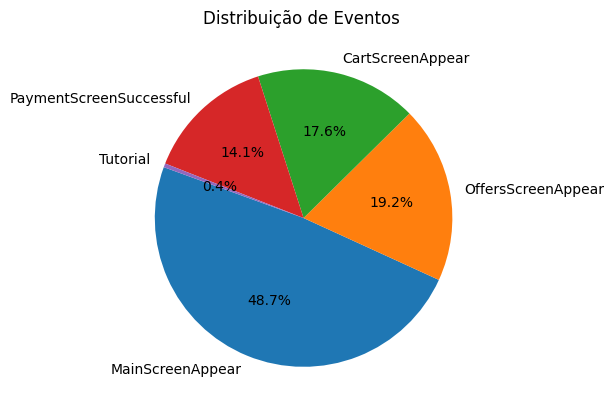

In [ ]:
event_counts = pd.Series({
    'MainScreenAppear': 117431,
    'OffersScreenAppear': 46333,
    'CartScreenAppear': 42303,
    'PaymentScreenSuccessful': 33918,
    'Tutorial': 1005
})
# Criar gráfico de pizza
plt.figure(figsize=(6, 8))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=160)
# Título
plt.title('Distribuição de Eventos ')
# Exibir gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A proporção de usuários por etapa do funil foi analisada
- A ordem das etapas foi calculada!
</div>

Encontre o número de usuários que executaram cada uma dessas ações. Ordene os eventos pelo número de usuários. Calcule a proporção de usuários que executaram a ação pelo menos uma vez.

In [ ]:
users_by_event = df_n.groupby('event')['user_id']

In [ ]:
users_by_event.nunique()

event
CartScreenAppear           3734
MainScreenAppear           7419
OffersScreenAppear         4593
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

In [ ]:
users_by_event = df_n.groupby('event')['user_id'].nunique().sort_values(ascending=False)

In [ ]:
users_by_event # usuarios por eventos por ordem decrescente

event
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

In [ ]:
users_by_event_ratio = users_by_event / total_users

In [ ]:
users_by_event_ratio # proporcao de eventos dos usuarios

event
MainScreenAppear           0.982519
OffersScreenAppear         0.608264
CartScreenAppear           0.494504
PaymentScreenSuccessful    0.468680
Tutorial                   0.111244
Name: user_id, dtype: float64

In [1]:
users_by_event_ratio = pd.Series({
    'MainScreenAppear': 0.982519,
    'OffersScreenAppear': 0.608264,
    'CartScreenAppear': 0.494504,
    'PaymentScreenSuccessful': 0.468680,
    'Tutorial': 0.111244
})
plt.pie(users_by_event_ratio, labels=users_by_event_ratio.index, autopct='%1.1f%%', startangle=120)
# Adicionando rótulos e título
plt.title('Proporção de Usuarios que executam acao ao menos uma vez')
# Exibir gráfico
plt.show()

NameError: name 'pd' is not defined

Em que ordem você acha que as ações ocorreram? Todos elas fazem parte de uma única sequência? Você não precisa levá-las em consideração ao calcular o funil.

In [ ]:
funnel_events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']

In [ ]:
# Calcular o funil
funnel = {}
for i, event in enumerate(funnel_events):
    users = df_n[df_n['event'] == event]['user_id'].nunique()
    funnel[event] = users

Use o funil de eventos para encontrar a parcela de usuários que passam de uma etapa para a próxima (por exemplo, para a sequência de eventos A → B → C, calcule a proporção de usuários na etapa B para o número de usuários na etapa A e a proporção de usuários na etapa C para o número na etapa B).


In [ ]:
# Calcular proporções entre as etapas
conversion_rates = {}
for i in range(len(funnel_events) - 1):
    step_current = funnel_events[i]
    step_next = funnel_events[i+1]
    conversion_rates[f'{step_current} → {step_next}'] = funnel[step_next] / funnel[step_current]

In [ ]:
conversion_rates

{'MainScreenAppear → OffersScreenAppear': 0.6190861302062273,
 'OffersScreenAppear → CartScreenAppear': 0.8129762682342695,
 'CartScreenAppear → PaymentScreenSuccessful': 0.9477771826459561,
 'PaymentScreenSuccessful → Tutorial': 0.23735518508053122}

Em qual fase você perde mais usuários?
Apos o pagamento quando vai para o tutorial.

Qual é a parcela de usuários que faz o caminho inteiro, desde o primeiro evento até o pagamento?

In [ ]:
funil = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful']

# Total de usuários únicos
usuarios_totais = df_n['user_id'].nunique()

# Seleciona usuários que participaram de todos os eventos do funil
usuarios_funil = df_n[df_n['event'].isin(funil)]
usuarios_por_evento = {
    etapa: set(usuarios_funil[usuarios_funil['event'] == etapa]['user_id']) for etapa in funil
}

# Interseção: usuários que passaram por todas as etapas
usuarios_completos = set.intersection(*usuarios_por_evento.values())

# Calcula proporção
usuarios_final = len(usuarios_completos)
taxa_conversao = usuarios_final / usuarios_totais

print (usuarios_final)
print (taxa_conversao)

3429
0.4551367135651712


3429 usuarios com uma taxa de conversao de 45%

5. Estudando os resultados do experimento

ExpId — número do experimento: 246 e 247 são os grupos de controle, 248 é o grupo de teste

In [ ]:
df_n['experiment_group'].value_counts()

248    84563
246    79302
247    77022
Name: experiment_group, dtype: int64

In [ ]:
#Verificar grupos experimentais por usuarios
user_by_group = df_n.groupby('experiment_group')['user_id'].nunique()

In [ ]:
print (user_by_group)

experiment_group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


In [ ]:
user_by_group.head()

experiment_group
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

Os grupos controle 246 tem 2484 usuarios e o controle 247 tem 2513 usuarios e o grupo 248 teste tem 2537.

Comparando os grupos A (controle)

In [ ]:
# Comparação A/A (grupos 246 e 247) — grupos de controle
# Lista dos eventos únicos
eventos = df_n['event'].unique()

In [ ]:
# Função para comparar dois grupos para um evento
def comparar_evento(evento):
    grupo1 = 246
    grupo2 = 247

    # Total de usuários em cada grupo
    total_1 = df_n[df_n['experiment_group'] == grupo1]['user_id'].nunique()
    total_2 = df_n[df_n['experiment_group'] == grupo2]['user_id'].nunique()

    # Usuários que realizaram o evento
    evento_1 = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo1)]['user_id'].nunique()
    evento_2 = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo2)]['user_id'].nunique()

    # Tabela de contingência
    tabela = [[evento_1, total_1 - evento_1], [evento_2, total_2 - evento_2]]

    # Teste qui-quadrado
    stat, p, dof, expected = chi2_contingency(tabela)

    resultado = f"{evento:25s} | p-valor: {p:.4f} | {'DIFERENÇA SIGNIFICATIVA' if p < 0.05 else 'sem diferença'}"
    return resultado

# Rodar para todos os eventos
resultados = [comparar_evento(e) for e in eventos]
for r in resultados:
    print(r)

Tutorial                  | p-valor: 0.9734 | sem diferença
MainScreenAppear          | p-valor: 0.8495 | sem diferença
OffersScreenAppear        | p-valor: 0.2602 | sem diferença
CartScreenAppear          | p-valor: 0.2400 | sem diferença
PaymentScreenSuccessful   | p-valor: 0.1212 | sem diferença


In [ ]:
evento_mais_popular = df_n['event'].value_counts().idxmax()
print(f"Evento mais popular: {evento_mais_popular}")

Evento mais popular: MainScreenAppear


In [ ]:
# Grupos de controle
grupo_A1 = 246
grupo_A2 = 247

# Total de usuários por grupo
usuarios_A1 = df_n[df_n['experiment_group'] == grupo_A1]['user_id'].nunique()
usuarios_A2 = df_n[df_n['experiment_group'] == grupo_A2]['user_id'].nunique()

# Usuários que realizaram o evento
usuarios_evento_A1 = df_n[(df_n['event'] == evento_mais_popular) &
                          (df_n['experiment_group'] == grupo_A1)]['user_id'].nunique()

usuarios_evento_A2 = df_n[(df_n['event'] == evento_mais_popular) &
                          (df_n['experiment_group'] == grupo_A2)]['user_id'].nunique()

# Proporções
prop_A1 = usuarios_evento_A1 / usuarios_A1
prop_A2 = usuarios_evento_A2 / usuarios_A2

print(f"Grupo 246 - {usuarios_evento_A1}/{usuarios_A1} = {prop_A1:.2%}")
print(f"Grupo 247 - {usuarios_evento_A2}/{usuarios_A2} = {prop_A2:.2%}")

Grupo 246 - 2450/2484 = 98.63%
Grupo 247 - 2476/2513 = 98.53%


In [ ]:
# Tabela de contingência
tabela = [
    [usuarios_evento_A1, usuarios_A1 - usuarios_evento_A1],
    [usuarios_evento_A2, usuarios_A2 - usuarios_evento_A2]
]

# Teste qui-quadrado
stat, p, _, _ = chi2_contingency(tabela)
print(f"p-valor: {p:.4f}")
if p < 0.05:
    print("Diferença significativa entre os grupos de controle")
else:
    print("Sem diferença significativa — divisão está válida")


p-valor: 0.8495
Sem diferença significativa — divisão está válida


In [ ]:
def teste_eventos_entre_grupos(df, grupo1=246, grupo2=247, alpha=0.05):
    eventos = df_n['event'].unique()
    resultados = []

    total_1 = df_n[df_n['experiment_group'] == grupo1]['user_id'].nunique()
    total_2 = df_n[df_n['experiment_group'] == grupo2]['user_id'].nunique()

    for evento in eventos:
        u1 = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo1)]['user_id'].nunique()
        u2 = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo2)]['user_id'].nunique()

        table = [[u1, total_1 - u1], [u2, total_2 - u2]]
        _, p, _, _ = chi2_contingency(table)

        resultados.append({
            'evento': evento,
            'grupo1_proporcao': u1 / total_1,
            'grupo2_proporcao': u2 / total_2,
            'p_valor': p,
            'significativo': p < alpha
        })

    return pd.DataFrame(resultados).sort_values('p_valor')

# Executar
resultado_eventos = teste_eventos_entre_grupos(df_n)
print(resultado_eventos)

                    evento  grupo1_proporcao  grupo2_proporcao   p_valor  \
4  PaymentScreenSuccessful          0.483092          0.460804  0.121224   
3         CartScreenAppear          0.509662          0.492638  0.239965   
2       OffersScreenAppear          0.620773          0.604855  0.260188   
1         MainScreenAppear          0.986312          0.985277  0.849457   
0                 Tutorial          0.111916          0.112614  0.973395   

   significativo  
4          False  
3          False  
2          False  
1          False  
0          False  


 Interpretação Final: estao bem balanceados

In [ ]:
# Função de comparação A/B entre dois
def comparar_grupos(df, grupo_a, grupo_b, alpha=0.05):
    eventos = df_n['event'].unique()
    resultados = []

    total_a = df_n[df_n['experiment_group'] == grupo_a]['user_id'].nunique()
    total_b = df_n[df_n['experiment_group'] == grupo_b]['user_id'].nunique()

    for evento in eventos:
        u_a = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo_a)]['user_id'].nunique()
        u_b = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo_b)]['user_id'].nunique()

        tabela = [[u_a, total_a - u_a], [u_b, total_b - u_b]]
        _, p, _, _ = chi2_contingency(tabela)

        resultados.append({
            'evento': evento,
            f'grupo_{grupo_a}_proporcao': u_a / total_a,
            f'grupo_{grupo_b}_proporcao': u_b / total_b,
            'p_valor': p,
            'significativo': p < alpha
        })

    return pd.DataFrame(resultados).sort_values('p_valor')

# IDs dos grupos
grupo_teste = 248
grupo_controle_1 = 246
grupo_controle_2 = 247

# Comparação 248 vs 246
resultado_248_vs_246 = comparar_grupos(df_n, grupo_teste, grupo_controle_1)

# Comparação 248 vs 247
resultado_248_vs_247 = comparar_grupos(df_n, grupo_teste, grupo_controle_2)

Comparando grupo B com controle combinado

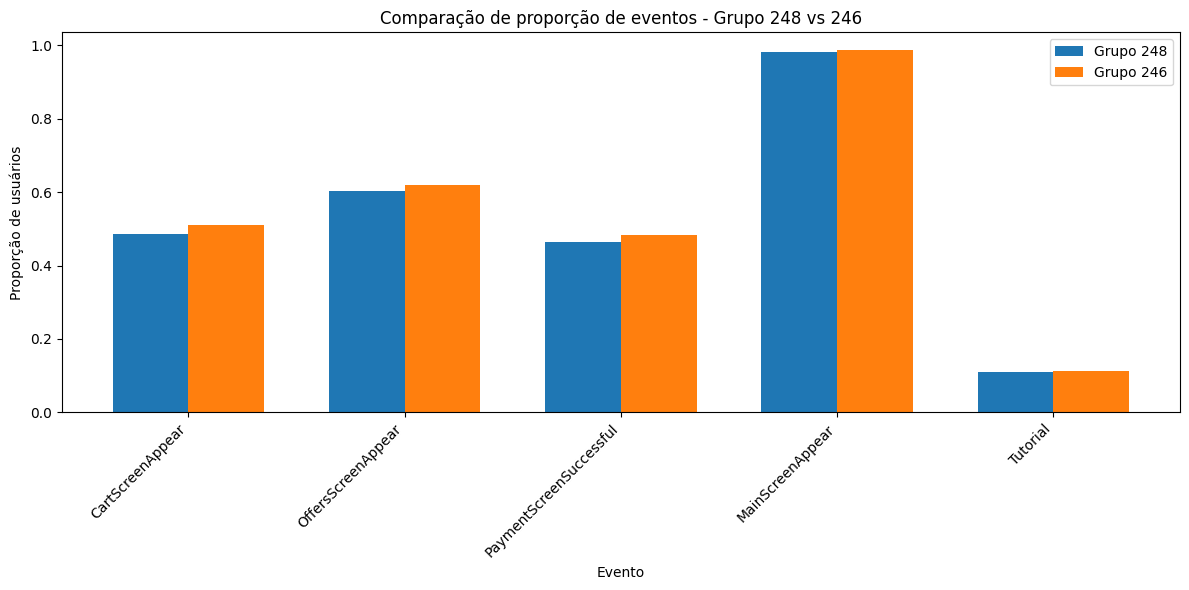

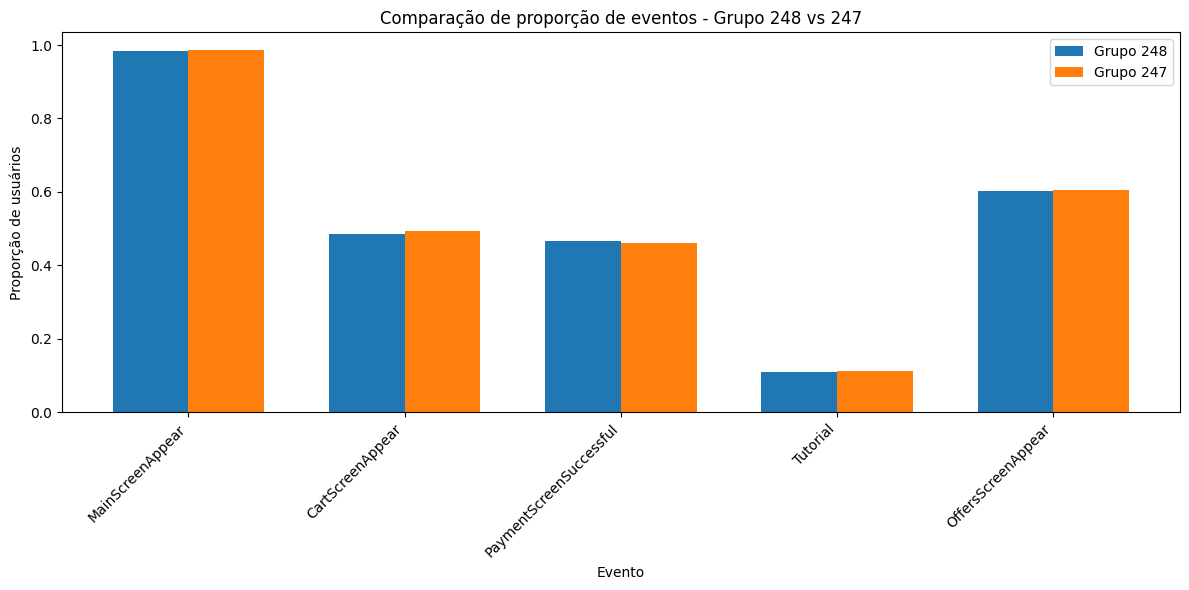

In [ ]:
def plot_comparacao(df_n_res, grupo_a, grupo_b, top_n=10):
    df_plot = df_n_res.copy().sort_values('p_valor').head(top_n)
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = range(len(df_plot))

    plt.bar(index, df_plot[f'grupo_{grupo_a}_proporcao'], bar_width, label=f'Grupo {grupo_a}')
    plt.bar([i + bar_width for i in index], df_plot[f'grupo_{grupo_b}_proporcao'], bar_width, label=f'Grupo {grupo_b}')

    plt.xlabel('Evento')
    plt.ylabel('Proporção de usuários')
    plt.title(f'Comparação de proporção de eventos - Grupo {grupo_a} vs {grupo_b}')
    plt.xticks([i + bar_width / 2 for i in index], df_plot['evento'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plots para cada comparação
plot_comparacao(resultado_248_vs_246, 248, 246)
plot_comparacao(resultado_248_vs_247, 248, 247)

Muito semelhante ao controle, ou seja nao existem diferencas significativas posso confiar nos grupos controle em relacao ao teste e na verdade pouco influenciou as novas fontes utilizadas.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A conversão dos usuários por etapa do funil foi analisada
- O percentual de usuários que percorrem todo o caminho foi calculado
- A perda de usuários foi calculada por etapa do funil
- O número de usuários por grupo foi analisado
</div>

In [ ]:
num_eventos = df_n['event'].nunique()
print(f" Número de testes estatísticos realizados: {num_eventos}")

 Número de testes estatísticos realizados: 5


o nível de significância padrão foi de 5%. Isso significa que:
A cada 100 testes, até 5 podem acusar uma diferença que não existe (falso positivo).

Com um nível de significância estatística de 0,1, um de cada 10 resultados pode ser falso. Qual deveria ser o nível de significância? Se você quiser alterá-lo, execute as etapas anteriores novamente e verifique suas conclusões.

In [ ]:
def teste_eventos_entre_grupos(df, grupo1=246, grupo2=247, alpha=0.1):
    eventos = df_n['event'].unique()
    resultados = []

    total_1 = df_n[df_n['experiment_group'] == grupo1]['user_id'].nunique()
    total_2 = df_n[df_n['experiment_group'] == grupo2]['user_id'].nunique()

    for evento in eventos:
        u1 = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo1)]['user_id'].nunique()
        u2 = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo2)]['user_id'].nunique()

        table = [[u1, total_1 - u1], [u2, total_2 - u2]]
        _, p, _, _ = chi2_contingency(table)

        resultados.append({
            'evento': evento,
            'grupo1_proporcao': u1 / total_1,
            'grupo2_proporcao': u2 / total_2,
            'p_valor': p,
            'significativo': p < alpha
        })

    return pd.DataFrame(resultados).sort_values('p_valor')

# Executar
resultado_eventos = teste_eventos_entre_grupos(df_n)
print(resultado_eventos)

                    evento  grupo1_proporcao  grupo2_proporcao   p_valor  \
4  PaymentScreenSuccessful          0.483092          0.460804  0.121224   
3         CartScreenAppear          0.509662          0.492638  0.239965   
2       OffersScreenAppear          0.620773          0.604855  0.260188   
1         MainScreenAppear          0.986312          0.985277  0.849457   
0                 Tutorial          0.111916          0.112614  0.973395   

   significativo  
4          False  
3          False  
2          False  
1          False  
0          False  


In [ ]:
# Função de comparação A/B entre dois
def comparar_grupos(df, grupo_a, grupo_b, alpha=0.1):
    eventos = df_n['event'].unique()
    resultados = []

    total_a = df_n[df_n['experiment_group'] == grupo_a]['user_id'].nunique()
    total_b = df_n[df_n['experiment_group'] == grupo_b]['user_id'].nunique()

    for evento in eventos:
        u_a = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo_a)]['user_id'].nunique()
        u_b = df_n[(df_n['event'] == evento) & (df_n['experiment_group'] == grupo_b)]['user_id'].nunique()

        tabela = [[u_a, total_a - u_a], [u_b, total_b - u_b]]
        _, p, _, _ = chi2_contingency(tabela)

        resultados.append({
            'evento': evento,
            f'grupo_{grupo_a}_proporcao': u_a / total_a,
            f'grupo_{grupo_b}_proporcao': u_b / total_b,
            'p_valor': p,
            'significativo': p < alpha
        })

    return pd.DataFrame(resultados).sort_values('p_valor')

# IDs dos grupos
grupo_teste = 248
grupo_controle_1 = 246
grupo_controle_2 = 247

# Comparação 248 vs 246
resultado_248_vs_246 = comparar_grupos(df_n, grupo_teste, grupo_controle_1)

# Comparação 248 vs 247
resultado_248_vs_247 = comparar_grupos(df_n, grupo_teste, grupo_controle_2)

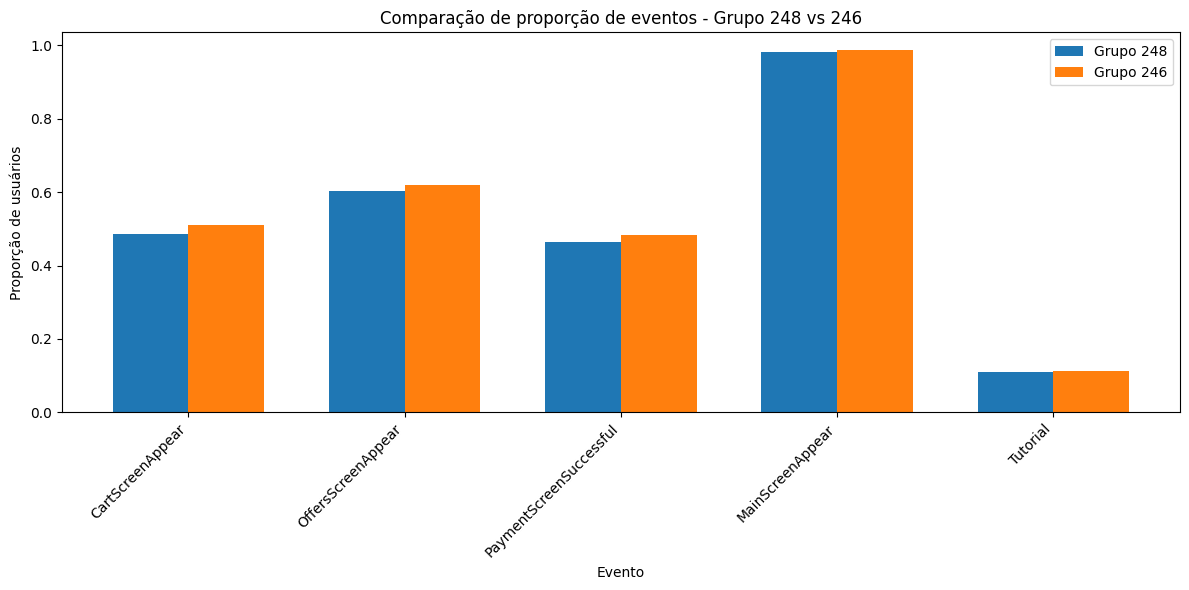

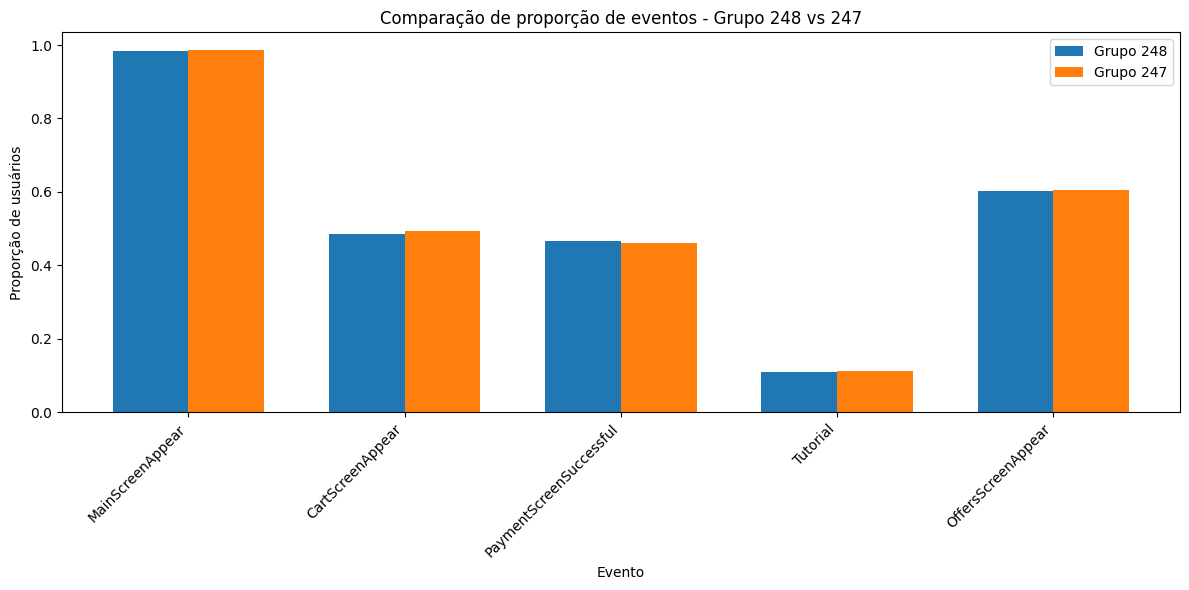

In [ ]:
def plot_comparacao(df_n_res, grupo_a, grupo_b, top_n=10):
    df_plot = df_n_res.copy().sort_values('p_valor').head(top_n)
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = range(len(df_plot))

    plt.bar(index, df_plot[f'grupo_{grupo_a}_proporcao'], bar_width, label=f'Grupo {grupo_a}')
    plt.bar([i + bar_width for i in index], df_plot[f'grupo_{grupo_b}_proporcao'], bar_width, label=f'Grupo {grupo_b}')

    plt.xlabel('Evento')
    plt.ylabel('Proporção de usuários')
    plt.title(f'Comparação de proporção de eventos - Grupo {grupo_a} vs {grupo_b}')
    plt.xticks([i + bar_width / 2 for i in index], df_plot['evento'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plots para cada comparação
plot_comparacao(resultado_248_vs_246, 248, 246)
plot_comparacao(resultado_248_vs_247, 248, 247)

Conclusoes Gerais do Projeto:
* Funil de conversão apresenta perda significativa nas etapas iniciais — foco possível para melhorias.
* Teste A/A confirmou a integridade da divisão de grupos.
* Nova fonte (teste A/B) não teve impacto estatisticamente comprovado no comportamento dos usuários.
* Recomendação: manter o design atual (ou testar outros elementos com impacto mais direto).

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O teste foi executado corretamente
- As estatísticas e `p-valor` foram calculados
- A conclusão final foi apresentada. Bom trabalho consolidando as análises realizadas!
</div>